In [20]:
import os

dataset_path = "dataset"   # change to your actual folder

# Count only directories inside the dataset folder
folders = [
    name for name in os.listdir(dataset_path)
    if os.path.isdir(os.path.join(dataset_path, name))
]

print("Number of folders:", len(folders))


Number of folders: 1356


In [21]:
from dataloader import load_parquet, preprocess_data, SlidingWindowDataset
from plotting import plot_testresult_sample
from torch.utils.data import DataLoader
import pandas as pd
from utils import deltas_to_coords

df = load_parquet("dataset", k=5000)
df.describe()

/zhome/63/7/219953/DeepLearning-1/dataloader.py:167: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df.set_index("Timestamp")
/zhome/63/7/219953/DeepLearning-1/dataloader.py:167: FutureWarning: DataFrameGroupBy.resample operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.set_index("Timestamp")


,Timestamp,Latitude,Longitude,SOG,COG,Segment,x,y
count,209703,209703.000000,209703.000000,209703.000000,209703.000000,209703.000000,2.097030e+05,2.097030e+05
mean,2025-02-27 11:54:01.390538240,56.071988,10.850177,2.610864,178.589893,0.408883,1.207836e+06,7.576170e+06
min,2025-02-27 00:00:00,53.894283,3.263667,0.000000,0.000000,0.000000,3.633097e+05,7.150160e+06
25%,2025-02-27 05:54:00,55.095523,9.614817,0.000000,92.700000,0.000000,1.070317e+06,7.380427e+06
50%,2025-02-27 11:54:00,55.787114,10.849438,1.335024,185.900000,0.000000,1.207754e+06,7.516152e+06
75%,2025-02-27 17:48:00,57.165822,12.193095,5.193104,254.202813,0.000000,1.357329e+06,7.794087e+06
max,2025-02-27 23:54:00,58.970759,16.719850,20.565738,359.900000,16.000000,1.861245e+06,8.174070e+06
std,NaN,1.144044,2.183740,2.930251,98.537992,1.350330,2.430928e+05,2.291753e+05


In [22]:
df = preprocess_data(df)
df.describe()

,Timestamp,Latitude,Longitude,SOG,COG,Segment,x,y
count,109746,109746.000000,109746.000000,109746.000000,109746.000000,109746.000000,1.097460e+05,1.097460e+05
mean,2025-02-27 11:53:55.191077888,56.122548,11.099381,4.814260,174.765639,0.552877,1.235577e+06,7.586689e+06
min,2025-02-27 00:06:00,53.895948,3.263667,0.000000,0.000000,0.000000,3.633097e+05,7.150475e+06
25%,2025-02-27 06:24:00,55.034861,9.873226,3.357916,82.295288,0.000000,1.099082e+06,7.368635e+06
50%,2025-02-27 11:54:00,55.910827,11.087811,5.057340,181.342401,0.000000,1.234289e+06,7.540684e+06
75%,2025-02-27 17:18:00,57.371173,12.468937,6.175440,251.888095,0.000000,1.388036e+06,7.836365e+06
max,2025-02-27 23:54:00,58.970759,16.697996,19.673037,359.666667,16.000000,1.858812e+06,8.174070e+06
std,NaN,1.212742,2.350865,2.295696,99.077345,1.491023,2.616970e+05,2.430096e+05


In [23]:
# Make sure Timestamp is a proper datetime column
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")

# Extract the hour of the day (0–23)
df["hour"] = df["Timestamp"].dt.hour

# Count rows per hour
hour_counts = df["hour"].value_counts().sort_index()



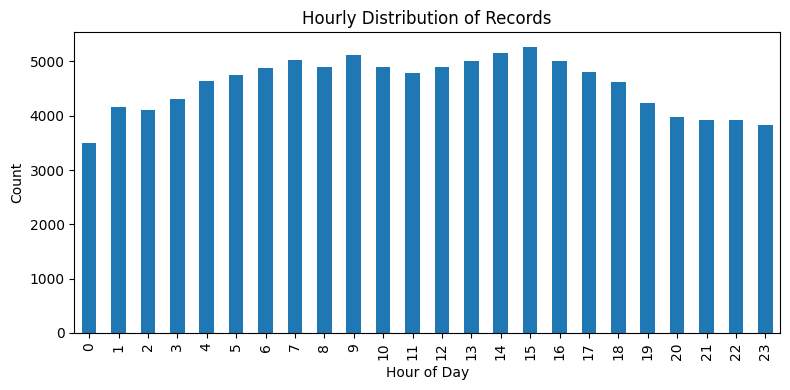

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
hour_counts.plot(kind="bar")
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.title("Hourly Distribution of Records")
plt.tight_layout()
plt.show()
